In [1]:
# ALWAYS CHECK FOR ASSUMPTIONS EACH METHOD MAKES!!!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from collections import Counter

from pylab import rcParams

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 10,8

## SIMPLE LINEAR REGRESSION

In [3]:
rooms = 2*np.random.rand(100,1)+3
rooms[1:10]

array([[3.64559525],
       [4.5970134 ],
       [3.35903016],
       [4.53288077],
       [4.05902963],
       [3.25461599],
       [3.32970102],
       [3.6105658 ],
       [4.47363859]])

In [4]:
price = 265 + 6*rooms + abs(np.random.randn(100,1))
price[1:10]

array([[288.57134172],
       [293.32605193],
       [285.28760579],
       [294.2509747 ],
       [290.01916981],
       [286.49644656],
       [285.18067392],
       [287.35397494],
       [292.60333404]])

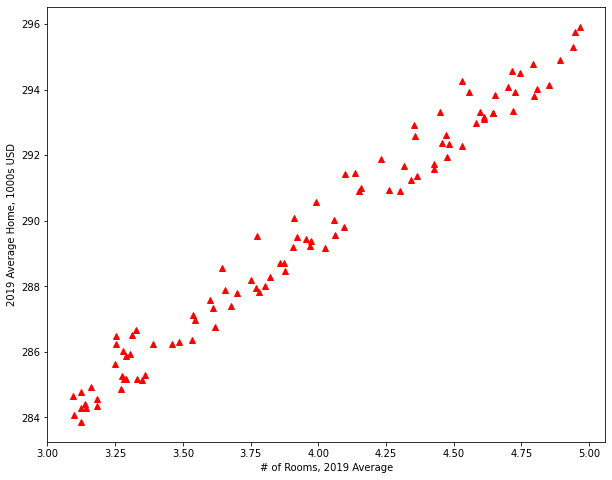

In [5]:
plt.plot(rooms,price, 'r^')
plt.xlabel("# of Rooms, 2019 Average")
plt.ylabel('2019 Average Home, 1000s USD')
plt.show()

In [6]:
x = rooms
y = price


LinReg = LinearRegression()         #Regression Object
LinReg.fit(x,y)
print(LinReg.intercept_, LinReg.coef_)

[265.94019123] [[5.94679239]]


In [7]:
print(LinReg.score(x,y))    #R-squared

0.9749920046206455


## MULTIPLE REGRESSION

In [8]:
address = '/content/sample_data/enrollment_forecast.csv'

enroll = pd.read_csv(address)
enroll.columns = ['year', 'enroll', 'unemploy', 'gradrate', 'income']
enroll.head()

,year,enroll,unemploy,gradrate,income
0,1,5501,8.1,9552,1923
1,2,5945,7.0,9680,1961
2,3,6629,7.3,9731,1979
3,4,7556,7.5,11666,2030
4,5,8716,7.0,14675,2112


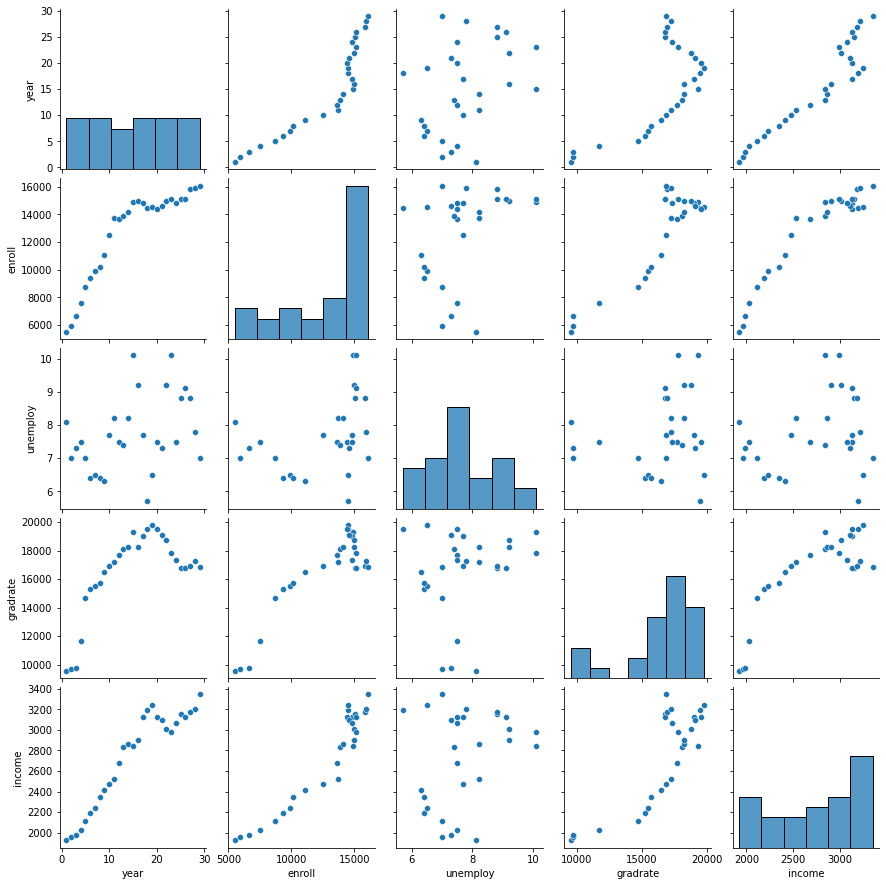

In [9]:
sns.pairplot(enroll)

In [10]:
enroll.corr()   #Checking for multicollinearity

,year,enroll,unemploy,gradrate,income
year,1.000000,0.900934,0.378305,0.670300,0.944287
enroll,0.900934,1.000000,0.391344,0.890294,0.949876
unemploy,0.378305,0.391344,1.000000,0.177376,0.282310
gradrate,0.670300,0.890294,0.177376,1.000000,0.820089
income,0.944287,0.949876,0.282310,0.820089,1.000000


In [11]:
enroll_data = enroll[['unemploy', 'gradrate']].values

enroll_target = enroll['enroll'].values

enroll_data_names = ['unemploy', 'gradrate']

x, y = scale(enroll_data), enroll_target

In [12]:
x[x==np.NAN]    #Checking for missing values

array([], dtype=float64)

In [13]:
LinReg = LinearRegression(normalize = True)

LinReg.fit(x,y)

print(LinReg.score(x,y))   #printing R-squared

0.8488812666133723


## LOGISTIC REGRESSION

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [15]:
address = '/content/sample_data/titanic-training-data.csv'
titanic_training = pd.read_csv('/content/sample_data/titanic-training-data.csv')
titanic_training.columns = ['passengerID', 'Survived', 'Pclass', 'Name', "Sex", 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

titanic_training.head()

,passengerID,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Pclass = Passenger Class (1, 2, 3 for 1st, 2nd, 3rd) <br>
SibSp = Number of Siblings/Spouses Aboard <br>
Parch = Number of Parents/Children Aboard <br>
Ticket = Ticket Number <br>
Embarked = Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [16]:
print(titanic_training.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerID  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


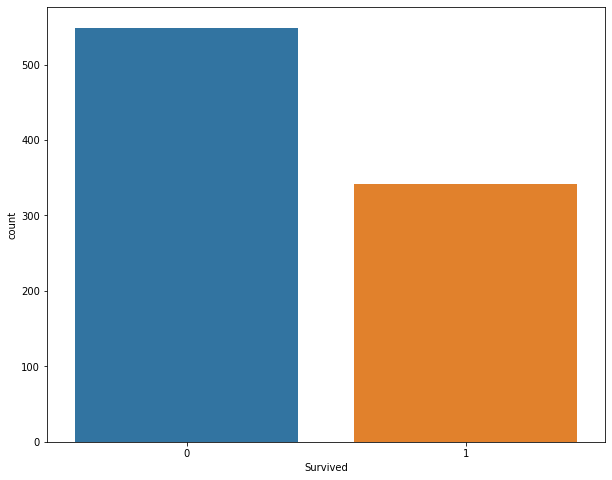

In [17]:
sns.countplot(x = 'Survived', data = titanic_training)     # Checking if Survived is Binary

In [18]:
# Checking for Missing Values
titanic_training.isnull().sum()

passengerID      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
# Dropping irrelevant columns and Cabin given that is full of NAs
titanic_data = titanic_training.drop(["Name", "Ticket", "Cabin"], axis = 1)
titanic_data

,passengerID,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


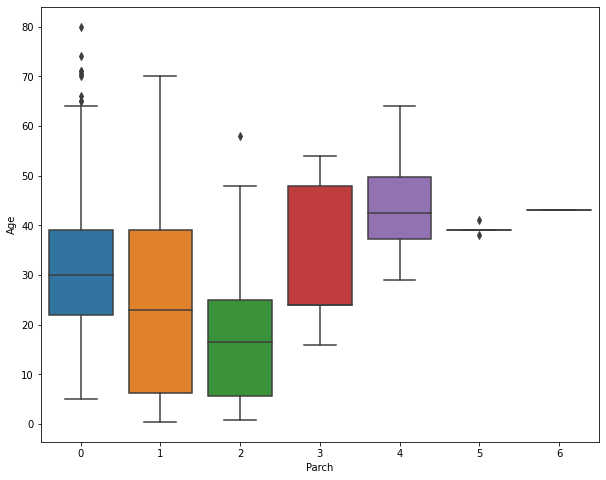

In [20]:
# Imputting Missing Values, checking distribution across parch and age
sns.boxplot(x ='Parch', y='Age', data= titanic_data)

In [21]:
Parch_groups = titanic_data.groupby("Parch")
Parch_groups.mean()

,passengerID,Survived,Pclass,Age,SibSp,Fare
Parch,,,,,,
0,445.255162,0.343658,2.321534,32.178503,0.237463,25.586774
1,465.110169,0.550847,2.203390,24.422000,1.084746,46.778180
2,416.662500,0.500000,2.275000,17.216912,2.062500,64.337604
3,579.200000,0.600000,2.600000,33.200000,1.000000,25.951660
4,384.000000,0.000000,2.500000,44.500000,0.750000,84.968750
5,435.200000,0.200000,3.000000,39.200000,0.600000,32.550000
6,679.000000,0.000000,3.000000,43.000000,1.000000,46.900000


In [22]:
def age_approx(cols):
    Age = cols[0]
    Parch = cols[1]

    if pd.isnull(Age):
        if Parch == 0:
            return 32
        elif Parch == 1:
            return 24
        elif Parch == 2:
            return 17
        elif Parch == 3:
            return 33
        elif Parch == 4:
            return 45
        else:
            return 30
    
    else:
        return Age

In [23]:
titanic_data['Age'] = titanic_data[['Age','Parch']].apply(age_approx, axis = 1)
titanic_data.isnull().sum()

passengerID    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [24]:
titanic_data = titanic_data.dropna()
titanic_data = titanic_data.reset_index(drop=True)
print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerID  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.6+ KB
None


In [25]:
# Converting categorical variables to dummy
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
gender_cat = titanic_data['Sex']       # Sex as dummy
gender_encoded = label_encoder.fit_transform(gender_cat)
display(gender_encoded[0:5])
titanic_data.head()                    # Male = 1 ; Female = 0

array([1, 0, 0, 0, 1])

,passengerID,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [26]:
gender_DF = pd.DataFrame(gender_encoded, columns=['male_gender'])
gender_DF.head()

,male_gender
0,1
1,0
2,0
3,0
4,1


In [27]:
embarked_cat = titanic_data['Embarked']
embarked_encoded = label_encoder.fit_transform(embarked_cat)
display(embarked_encoded[0:5])              # 3 categories, we need binary
titanic_data.head()

array([2, 0, 2, 2, 2])

,passengerID,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [28]:
# OneHotEncoder for categorical binary, OrdinalEncoder for ordinal, LabelEncoder for categorical > 2 options + OneHotEncoder+reshape+toarray

from sklearn.preprocessing import OneHotEncoder

binary_encoder = OneHotEncoder(categories='auto')
embarked_1hot = binary_encoder.fit_transform(embarked_encoded.reshape(-1,1))
embarked_1hot_mat = embarked_1hot.toarray()
embarked_DF = pd.DataFrame(embarked_1hot_mat, columns = ['C','Q','S'])
embarked_DF.head()

,C,Q,S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [29]:
titanic_data = titanic_data.drop(['Sex', 'Embarked'], axis=1)
titanic_data.head()

,passengerID,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [30]:
titanic_dmy = pd.concat([titanic_data, gender_DF, embarked_DF], axis=1, verify_integrity=True).astype(float)
titanic_dmy.head()

,passengerID,Survived,Pclass,Age,SibSp,Parch,Fare,male_gender,C,Q,S
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,1.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,1.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,0.0,1.0


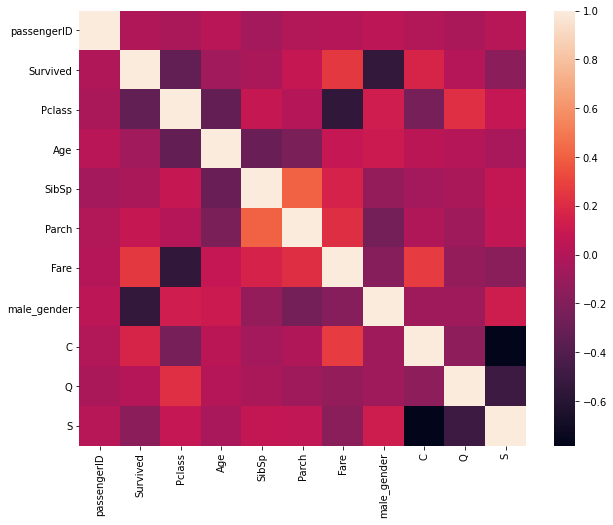

In [31]:
# Checking for independence between features, multicollinearity
sns.heatmap(titanic_dmy.corr())


In [32]:
# Dropping fare and pclass (correlated)
titanic_dmy.drop(['Fare','Pclass'], axis=1, inplace=True)
titanic_dmy.head()

,passengerID,Survived,Age,SibSp,Parch,male_gender,C,Q,S
0,1.0,0.0,22.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2.0,1.0,38.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3.0,1.0,26.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.0,1.0,35.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5.0,0.0,35.0,0.0,0.0,1.0,0.0,0.0,1.0


In [33]:
# Preparing test and training data
X_train, X_test, y_train, y_test = train_test_split(titanic_dmy.drop('Survived', axis=1),
                                                    titanic_dmy['Survived'], test_size=0.2,
                                                    random_state=200)

In [34]:
# Logistic Regression
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
# Making Training Prediction
y_pred = LogReg.predict(X_test)

In [36]:
# Model Evaluation
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       109
         1.0       0.79      0.71      0.75        69

    accuracy                           0.81       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



In [37]:
# Cross-Validation & Confusion Matrix
y_train_pred = cross_val_predict(LogReg, X_train, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)

array([[377,  63],
       [ 91, 180]])

In [38]:
precision_score(y_train, y_train_pred)

0.7407407407407407

In [39]:
# Making Test Prediction
test_passenger = np.array([866,40,0,0,0,0,0,1]).reshape(1,-1)

print(LogReg.predict(test_passenger))

[1.]


## CLUSTERING MODELS, K-MEANS, HIERARCHICAL

In [40]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

In [41]:
# Importing iris dataset
iris = datasets.load_iris()

# Scaling parameters
X = scale(iris.data)
y = pd.DataFrame(iris.target)
variable_names = iris.feature_names
X[0:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

In [42]:
# Initializing cluster
clustering = KMeans(n_clusters=3, random_state=5)

clustering.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

In [43]:
# Plotting model

iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['Sepal_Length','Sepal_Width', 'Petal_Length', 'Petal_Width']
y.columns = ['Target']

Text(0.5, 1.0, 'K-Means Classification')

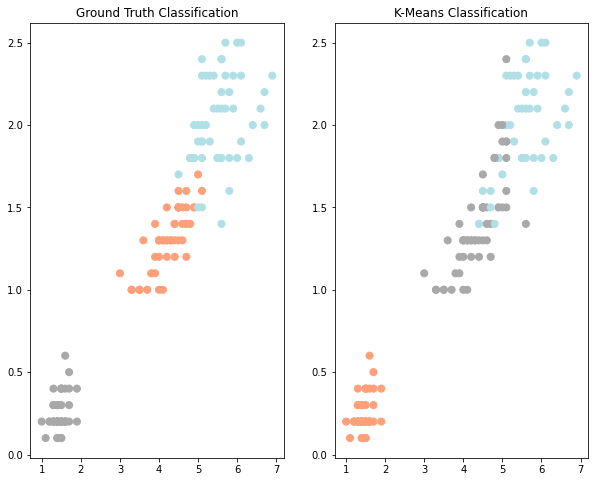

In [44]:
color_theme = np.array(['darkgrey', 'lightsalmon','powderblue'])

plt.subplot(1,2,1)

plt.scatter(iris_df.Petal_Length, iris_df.Petal_Width, c= color_theme[iris.target], s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)

plt.scatter(iris_df.Petal_Length, iris_df.Petal_Width, c= color_theme[clustering.labels_], s=50)
plt.title('K-Means Classification')

In [45]:
#### Hierarchical Methods

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist


In [46]:
cars = pd.read_csv('/content/sample_data/mtcars.csv')

cars.columns = ['car_names','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']

X = cars[['mpg','disp','hp','wt']].values

y = cars['am'].values

In [47]:
# Generating dendrograms
Z = linkage(X, 'ward')

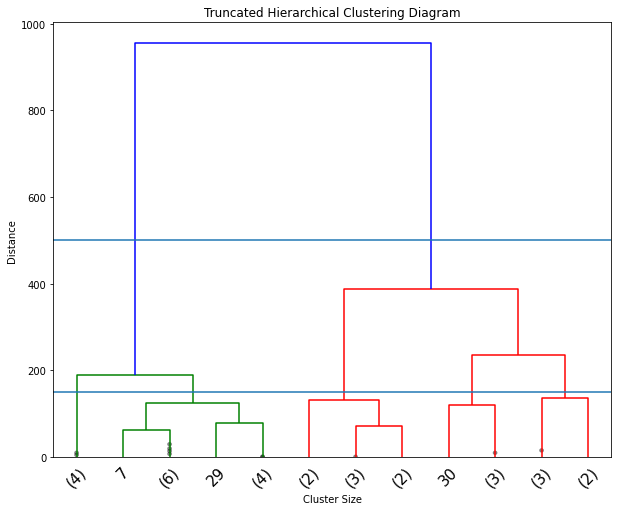

In [48]:
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45, leaf_font_size=15, show_contracted=True)

plt.title('Truncated Hierarchical Clustering Diagram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.axhline(y=500)
plt.axhline(y=150)
plt.show()

In [49]:
### Generating hierarchical Clusters
k = 2

Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.78125

In [50]:
# Trying different combinations
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')     #Changing affinity and linkage
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.78125

In [51]:
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='manhattan', linkage='average')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.71875

## DIMENSION REDUCTION METHODS. FACTOR ANALYSIS

In [52]:
from sklearn.decomposition import FactorAnalysis
from sklearn import datasets

In [53]:
iris = datasets.load_iris()

X = iris.data
variable_names = iris.feature_names

X[0:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [54]:
# Running Factor Analysis
factor = FactorAnalysis().fit(X)

DF = pd.DataFrame(factor.components_, columns=variable_names)
print(DF)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.706989         -0.158005           1.654236           0.70085
1           0.115161          0.159635          -0.044321          -0.01403
2          -0.000000          0.000000           0.000000           0.00000
3          -0.000000          0.000000           0.000000          -0.00000


In [55]:
# Principal Component Analysis (PCA)
from sklearn import decomposition
from sklearn.decomposition import PCA

In [56]:
X = iris.data
variable_names = iris.feature_names

X[0:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [57]:
pca = decomposition.PCA()
iris_pca = pca.fit_transform(X)

pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [58]:
sum(pca.explained_variance_ratio_)

1.0

In [59]:
## I'll keep only first two components (97% variance)
comps = pd.DataFrame(pca.components_, columns=variable_names)
comps

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.361387,-0.084523,0.856671,0.358289
1,0.656589,0.730161,-0.173373,-0.075481
2,-0.582030,0.597911,0.076236,0.545831
3,-0.315487,0.319723,0.479839,-0.753657


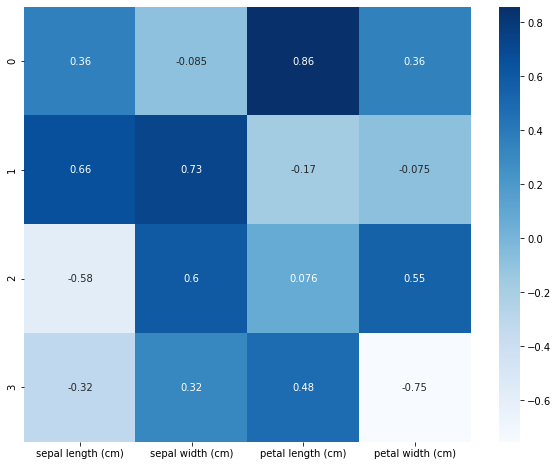

In [60]:
sns.heatmap(comps, cmap='Blues', annot=True)

## ASSOCIATION RULES

In [61]:
## Apriori

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [62]:
data = pd.read_csv('/content/sample_data/groceries.csv')
data.head()

,1,2,3,4,5,6,7,8,9
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN


In [63]:
# Data Conversion
basket_sets = pd.get_dummies(data)
basket_sets.head()

,1_Instant food products,1_UHT-milk,1_artif. sweetener,1_baby cosmetics,1_bags,1_baking powder,1_bathroom cleaner,1_beef,1_berries,1_beverages,1_bottled beer,1_bottled water,1_brandy,1_brown bread,1_butter,1_butter milk,1_candy,1_canned beer,1_canned fish,1_canned fruit,1_canned vegetables,1_cat food,1_chewing gum,1_chicken,1_chocolate,1_chocolate marshmallow,1_citrus fruit,1_cleaner,1_cling film/bags,1_coffee,1_condensed milk,1_cookware,1_cream cheese,1_curd,1_curd cheese,1_decalcifier,1_dental care,1_dessert,1_detergent,1_dish cleaner,...,9_pastry,9_pet care,9_photo/film,9_pickled vegetables,9_popcorn,9_pot plants,9_potato products,9_processed cheese,9_red/blush wine,9_rice,9_rolls/buns,9_root vegetables,9_rubbing alcohol,9_rum,9_salt,9_salty snack,9_sauces,9_seasonal products,9_semi-finished bread,9_shopping bags,9_skin care,9_sliced cheese,9_soda,9_soft cheese,9_sparkling wine,9_specialty bar,9_specialty cheese,9_specialty vegetables,9_spread cheese,9_sugar,9_sweet spreads,9_tea,9_vinegar,9_waffles,9_whipped/sour cream,9_white bread,9_white wine,9_whole milk,9_yogurt,9_zwieback
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [64]:
# Minimum support of 2%
apriori(basket_sets, min_support=0.02, use_colnames=True).head()

,support,itemsets
0,0.030421,(1_beef)
1,0.034951,(1_canned beer)
2,0.029126,(1_chicken)
3,0.049191,(1_citrus fruit)
4,0.064401,(1_frankfurter)


In [65]:
df = basket_sets

frequent_itemsets = apriori(basket_sets, min_support=0.002, use_colnames=True)

frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))   #Column with length of combination
frequent_itemsets[frequent_itemsets.length >= 3]    #Items that are frequently purchased together

,support,itemsets,length
820,0.002589,"(3_other vegetables, 2_root vegetables, 1_beef)",3
821,0.002589,"(1_chicken, 3_whole milk, 2_other vegetables)",3
822,0.002589,"(3_whole milk, 1_citrus fruit, 2_other vegetab...",3
823,0.003236,"(3_pip fruit, 1_citrus fruit, 2_tropical fruit)",3
824,0.002589,"(3_other vegetables, 4_whole milk, 1_citrus fr...",3
825,0.002265,"(1_frankfurter, 6_whole milk, 5_other vegetables)",3
826,0.002265,"(3_other vegetables, 4_whole milk, 1_pork)",3
827,0.003560,"(1_root vegetables, 3_whole milk, 2_other vege...",3
828,0.002589,"(1_sausage, 2_rolls/buns, 3_soda)",3
829,0.002265,"(3_other vegetables, 1_sausage, 4_whole milk)",3


In [66]:
# Setting Association Rules with Confidence as metric
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(2_sausage),(1_frankfurter),0.011327,0.064401,0.011327,1.000000,15.527638,0.010597,inf
1,(7_pastry),(1_frankfurter),0.005178,0.064401,0.002589,0.500000,7.763819,0.002256,1.871197
2,(2_ham),(1_sausage),0.007120,0.076052,0.004531,0.636364,8.367505,0.003989,2.540858
3,(2_meat),(1_sausage),0.006796,0.076052,0.004854,0.714286,9.392097,0.004338,3.233819
4,(3_beef),(1_sausage),0.004854,0.076052,0.002589,0.533333,7.012766,0.002220,1.979889


In [67]:
# Now with lift as metric
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules.head()       #Difference in confidence makes citrus then beef a better prediction than beef then citrus

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(1_beef),(2_citrus fruit),0.030421,0.028803,0.005502,0.180851,6.278986,0.004625,1.185618
1,(2_citrus fruit),(1_beef),0.028803,0.030421,0.005502,0.191011,6.278986,0.004625,1.198508
2,(1_beef),(2_other vegetables),0.030421,0.058900,0.003236,0.106383,1.806173,0.001444,1.053136
3,(2_other vegetables),(1_beef),0.058900,0.030421,0.003236,0.054945,1.806173,0.001444,1.025950
4,(1_beef),(2_root vegetables),0.030421,0.036893,0.005502,0.180851,4.902016,0.004379,1.175741


In [68]:
rules[(rules.lift >= 10) & (rules.confidence >= .9)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
93,(2_sausage),(1_frankfurter),0.011327,0.064401,0.011327,1.000000,15.527638,0.010597,inf
779,(7_whole milk),(6_other vegetables),0.004207,0.007120,0.003883,0.923077,129.650350,0.003854,12.907443
795,(9_whipped/sour cream),(8_yogurt),0.002265,0.004854,0.002265,1.000000,206.000000,0.002254,inf
814,"(3_pip fruit, 1_citrus fruit)",(2_tropical fruit),0.003236,0.034628,0.003236,1.000000,28.878505,0.003124,inf
875,"(4_butter, 2_other vegetables)",(3_whole milk),0.002265,0.057929,0.002265,1.000000,17.262570,0.002134,inf
881,"(4_curd, 2_other vegetables)",(3_whole milk),0.003883,0.057929,0.003560,0.916667,15.824022,0.003335,11.304854
906,"(2_root vegetables, 4_whole milk)",(3_other vegetables),0.006149,0.045955,0.005825,0.947368,20.615271,0.005543,18.126861
917,"(3_other vegetables, 5_butter)",(4_whole milk),0.003560,0.033333,0.003560,1.000000,30.000000,0.003441,inf
929,"(3_other vegetables, 6_yogurt)",(4_whole milk),0.003560,0.033333,0.003560,1.000000,30.000000,0.003441,inf
940,"(6_whole milk, 3_pip fruit)",(5_other vegetables),0.002265,0.012621,0.002265,1.000000,79.230769,0.002237,inf


## NEURAL NETWORKS

In [69]:
# BUILDING PERCEPTRON WITH LINEAR ACTIVATION FUNCTION

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron

X = iris.data
y = iris.target

X[0:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [71]:
# Standardizing datasets
standardize = StandardScaler()

standard_X_test = standardize.fit_transform(X_test)
standard_X_train = standardize.fit_transform(X_train)

In [72]:
standard_X_test[0:10,]

array([[ 1.01160702, -0.08600261,  0.76134356,  1.34848306],
       [-0.30268557, -0.08600261,  0.11213587,  0.00893035],
       [-0.30268557, -0.6020183 ,  0.58428692,  0.94661725],
       [-0.90009129,  1.97806013, -1.42235502, -1.33062236],
       [-1.01957243,  1.46204445, -1.4813739 , -1.46457763],
       [ 0.89212588, -0.34401046,  0.40723028,  0.00893035],
       [-0.90009129,  1.72005229, -1.42235502, -1.19666709],
       [-1.01957243,  0.94602876, -1.36333614, -1.19666709],
       [ 0.53368245,  0.68802092,  0.46624916,  0.41079616],
       [-1.01957243,  0.43001307, -1.59941166, -1.46457763]])

In [73]:
perceptron = Perceptron(max_iter = 50, eta0 = 0.15, tol = 1e-3, random_state= 15)

perceptron.fit(standard_X_train, y_train.ravel())

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.15,
           fit_intercept=True, max_iter=50, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=15, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [74]:
# Now making predictions on test data
y_pred = perceptron.predict(standard_X_test)

print(y_test)

[2 1 2 0 0 1 0 0 1 0 2 2 0 1 1 2 2 2 1 1 2 1 1 1 1 0 0 2 2 2]


In [75]:
print(y_pred)

[2 0 2 0 0 0 0 0 0 0 2 2 0 0 0 1 2 2 1 1 2 1 1 1 1 0 0 2 2 2]


In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      1.00      0.76         8
           1       0.86      0.55      0.67        11
           2       1.00      0.91      0.95        11

    accuracy                           0.80        30
   macro avg       0.82      0.82      0.79        30
weighted avg       0.85      0.80      0.80        30



## KNN CLASSIFICATION

In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale

In [78]:
# Using cars dataset, classify as automatic is the goal
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [79]:
X_prime = cars[['mpg', 'disp', 'hp', 'wt']].values
y = cars['am'].values

In [80]:
# Scaling variables
X = scale(X_prime)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 17)

In [82]:
# Building model
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
print(clf)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


In [83]:
# Evaluating model predictions
y_pred = clf.predict(X_test)
y_expect = y_test

print(classification_report(y_expect, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.67      0.80         3

    accuracy                           0.86         7
   macro avg       0.90      0.83      0.84         7
weighted avg       0.89      0.86      0.85         7



## NAIVE BAYES

In [99]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [89]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'

In [94]:
import urllib.request

raw_data = urllib.request.urlopen(url)
dataset = np.loadtxt(raw_data, delimiter=',')
print(dataset[0])

[  0.      0.64    0.64    0.      0.32    0.      0.      0.      0.
   0.      0.      0.64    0.      0.      0.      0.32    0.      1.29
   1.93    0.      0.96    0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.778   0.      0.
   3.756  61.    278.      1.   ]


In [97]:
X = dataset[:,0:48]

y = dataset[:,-1]

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=17)

In [100]:
BernNB = BernoulliNB(binarize=True)
BernNB.fit(X_train, y_train)
print(BernNB)

y_expect = y_test
y_pred = BernNB.predict(X_test)

print(accuracy_score(y_expect, y_pred))

BernoulliNB(alpha=1.0, binarize=True, class_prior=None, fit_prior=True)
0.8577633007600435


In [102]:
MultiNB = MultinomialNB()
MultiNB.fit(X_train, y_train)
print(MultiNB)

y_expect = y_test
y_pred = MultiNB.predict(X_test)

print(accuracy_score(y_expect, y_pred))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
0.8816503800217155


In [104]:
GausNB = GaussianNB()
GausNB.fit(X_train, y_train)
print(GausNB)

y_expect = y_test
y_pred = GausNB.predict(X_test)

print(accuracy_score(y_expect, y_pred))

GaussianNB(priors=None, var_smoothing=1e-09)
0.8197611292073833
